What is this dataset all about?
Overview:
This dataset contains patient information, bone mineral density (BMD) measurements, fractal dimension (FD) values, and osteoporosis diagnoses. It is used to analyze risk factors and predict osteoporosis using machine learning.

**Key Features Patient Information: Age, BMI, height, weight. Bone Density Measurements: BMD (g/cm²) and T-Scores for L1-L4 spine, femoral neck, and total femur. Higher BMD and T-scores indicate stronger bones. Fractal Dimension (FD) Values: Measures bone microarchitecture in different regions. Cortical Thickness: Thickness of the outer bone layer (panoramic and transversal views). Osteoporosis Diagnosis (Binary): Spine & Hip Osteoporosis: 1 = Diagnosed, 0 = Not diagnosed. Unified Diagnosis: 1 if osteoporosis is present in any major bone site.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('train_database_matheus.csv', sep=';')

# Define target columns
target_cols = ['T-Score Colo Femoral', 'T-Score Fêmur Total', 'T-Score L1-L4']

# Drop non-numeric or irrelevant columns if needed
df = df.select_dtypes(include='number')  # Keep only numeric features
X = df.drop(columns=target_cols)
y = df[target_cols]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
for i, col in enumerate(target_cols):
    print(f"\n--- {col} ---")
    print("R² Score:", r2_score(y_test[col], y_pred[:, i]))
    print("MSE:", mean_squared_error(y_test[col], y_pred[:, i]))



--- T-Score Colo Femoral ---
R² Score: -1.2032309774446963
MSE: 2.62906044461032

--- T-Score Fêmur Total ---
R² Score: -1.4801017341818214
MSE: 4.426671582797779

--- T-Score L1-L4 ---
R² Score: -1.2331978148722023
MSE: 7.007551423287483


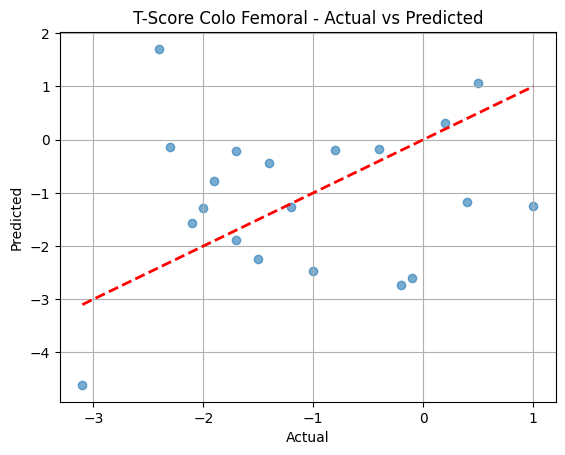

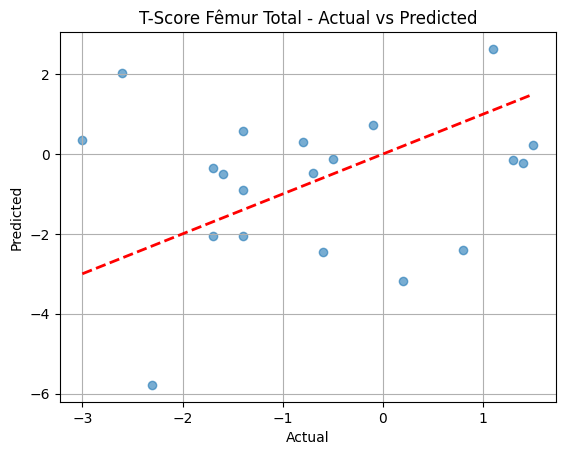

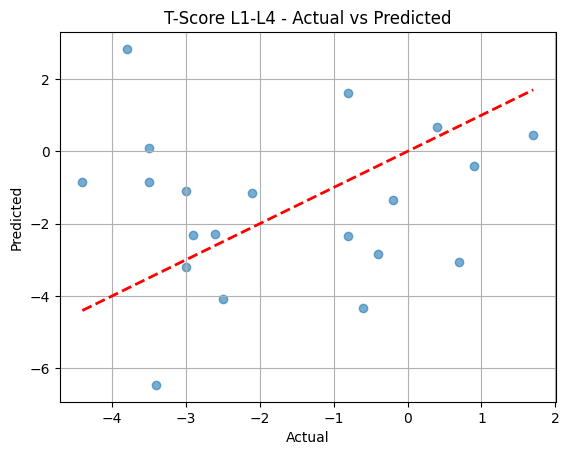

{'T-Score Colo Femoral': {'R2': -1.2032309774446963, 'MSE': 2.62906044461032},
 'T-Score Fêmur Total': {'R2': -1.4801017341818214, 'MSE': 4.426671582797779},
 'T-Score L1-L4': {'R2': -1.2331978148722023, 'MSE': 7.007551423287483}}

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select only numeric columns to avoid issues with text
df_numeric = df.select_dtypes(include='number')

# Define target and feature columns
target_cols = ['T-Score Colo Femoral', 'T-Score Fêmur Total', 'T-Score L1-L4']
X = df_numeric.drop(columns=target_cols)
y = df_numeric[target_cols]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate and plot
results = {}
for i, col in enumerate(target_cols):
    r2 = r2_score(y_test[col], y_pred[:, i])
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    results[col] = {'R2': r2, 'MSE': mse}
    
    # Plot actual vs predicted
    plt.figure()
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.6)
    plt.plot([y_test[col].min(), y_test[col].max()],
             [y_test[col].min(), y_test[col].max()],
             'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{col} - Actual vs Predicted')
    plt.grid(True)
    plt.show()

results


I’ll apply PCA to my  dataset before training the model and show how many components are needed to capture 95% of the data's variance. Then, we’ll retrain the Linear Regression model using those components.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and keep enough components to explain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Number of components selected
n_components = X_pca.shape[1]

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Linear Regression on PCA-transformed data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate performance after PCA
pca_results = {}
for i, col in enumerate(target_cols):
    r2 = r2_score(y_test_pca[col], y_pred_pca[:, i])
    mse = mean_squared_error(y_test_pca[col], y_pred_pca[:, i])
    pca_results[col] = {'R2': r2, 'MSE': mse}

pca_results, n_components


({'T-Score Colo Femoral': {'R2': -37.085565520168224,
   'MSE': 45.44655319607874},
  'T-Score Fêmur Total': {'R2': -5.278257484054713, 'MSE': 11.205904826852157},
  'T-Score L1-L4': {'R2': -21.153491165086624, 'MSE': 69.51543992692531}},
 77)